In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Гиперпараметры
batch_size = 64
epochs = 10
learning_rate = 0.001

In [3]:
# Загрузка данных (MNIST)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 19.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 590kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.42MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.24MB/s]


In [4]:
# Определение нейросети
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [5]:
# Инициализация модели, функции потерь и оптимизатора
model = MLP()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

# Обучение модели
for epoch in range(epochs):
    for images, labels in train_loader:
        model.train()
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0802
Epoch [2/10], Loss: 0.0810
Epoch [3/10], Loss: 0.0192
Epoch [4/10], Loss: 0.1533
Epoch [5/10], Loss: 0.2313
Epoch [6/10], Loss: 0.0069
Epoch [7/10], Loss: 0.0285
Epoch [8/10], Loss: 0.0560
Epoch [9/10], Loss: 0.0440
Epoch [10/10], Loss: 0.0032


In [6]:
# Оценка точности
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 96.87%


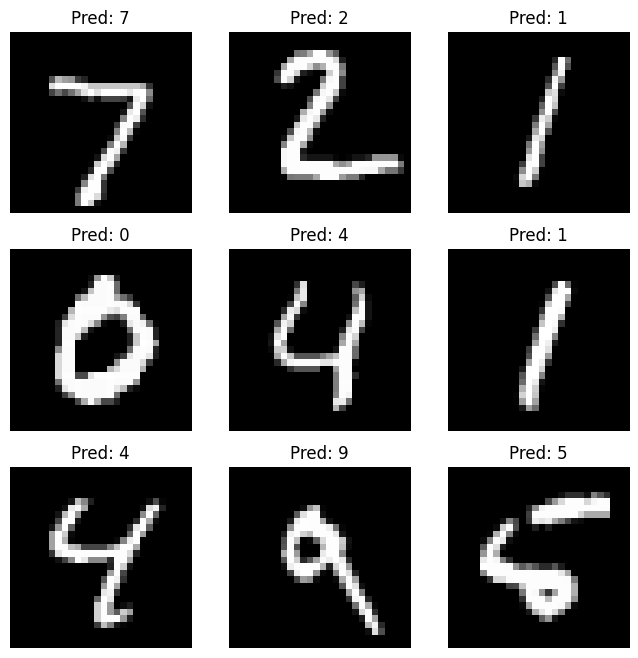

In [7]:
# Визуализация предсказаний
images, labels = next(iter(test_loader))
with torch.no_grad():
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f'Pred: {predictions[i].item()}')
    ax.axis('off')
plt.show()